<a href="https://colab.research.google.com/github/ell-sie/pet-classification/blob/main/prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

---

# Fashion MNIST Project
* Group members and roles:
  * Uwimbabazi Keza: Implemented model_1 & Documentation
  * Martin Ndungu: Implemented model_2 & 3, Prediction analysis
  * Cumi Oyemike: Implemented model_2 & 3, Prediction analysis
  * Elsie Ndiramiye: Documentation
  * Nino C. Nwachukwu: Model Architecture & Documentation


# Project Overview

The primary aim of the project was to leverage deep learning techniques to classify clothing items depicted in the Fashion MNIST dataset. By training a neural network on this dataset, we aimed to create a model that could automatically recognize and categorize clothing items into their respective classes.


# Case Study and Implementation




In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# The Dataset
We used the Fashion MNIST dataset, which consists of grayscale images of various fashion items. The dataset provides a collection of grayscale images of various clothing items belonging to 10 distinct categories. Each image is a 28x28 pixel representation, making it suitable for training and evaluating machine learning models.

Data Preparation:
We loaded and preprocessed the Fashion MNIST dataset, which included normalizing the image pixel values and splitting the data into training, validation, and test sets.


In [ ]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
fashion_data = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_data.load_data()

#preprocess data to create range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

#labels converted into binary vectors
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


# SECTION 1: Model Implementation

#Task: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Create A Model Without any Optimization techniques


In [ ]:
model_1= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [ ]:
model_1.compile(loss= tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [ ]:
from typing import ParamSpecArgs
#history = model_1.fit(ParamSpecArgs)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


750/750 [==============================] - 5s 5ms/step - loss: 0.5488 - accuracy: 0.8048 - val_loss: 0.4182 - val_accuracy: 0.8466
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3910 - accuracy: 0.8563 - val_loss: 0.3811 - val_accuracy: 0.8600
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3508 - accuracy: 0.8714 - val_loss: 0.3426 - val_accuracy: 0.8757
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3253 - accuracy: 0.8797 - val_loss: 0.3763 - val_accuracy: 0.8638
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3063 - accuracy: 0.8866 - val_loss: 0.3454 - val_accuracy: 0.8809
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2934 - accuracy: 0.8920 - val_loss: 0.3809 - val_accuracy: 0.8700
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2813 - accuracy: 0.8954 - val_loss: 0.3369 - val_accuracy: 0.8767
Epoch 8/10
750/75

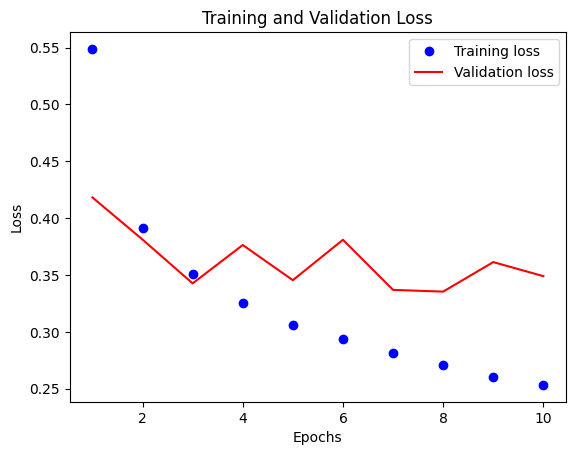

In [ ]:
# Train the model
history = model_1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model_1.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model_1.predict(x_test)[0]
#y_test[0]

313/313 [==============================] - 1s 2ms/step


array([1.4515480e-07, 1.0394650e-11, 1.8978547e-08, 9.1687184e-08,
       1.7675021e-07, 2.5432292e-04, 3.7313181e-05, 1.8111402e-03,
       1.7483033e-07, 9.9789673e-01], dtype=float32)

# SECTION 2: Optimization and Regularization implementation
At this point you should now create a model that is more optimized in order to see better perfomance.
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/10
750/750 [==============================] - 6s 7ms/step - loss: 1.9177 - accuracy: 0.8119 - val_loss: 0.9248 - val_accuracy: 0.8338
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.8001 - accuracy: 0.8352 - val_loss: 0.6915 - val_accuracy: 0.8450
Epoch 3/10
750/750 [==============================] - 5s 6ms/step - loss: 0.6717 - accuracy: 0.8415 - val_loss: 0.6399 - val_accuracy: 0.8468
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.6283 - accuracy: 0.8481 - val_loss: 0.6279 - val_accuracy: 0.8442
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.6074 - accuracy: 0.8488 - val_loss: 0.6032 - val_accuracy: 0.8451
Epoch 6/10
750/750 [==============================] - 5s 6ms/step - loss: 0.5937 - accuracy: 0.8503 - val_loss: 0.5979 - val_accuracy: 0.8479
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.5761 - accuracy: 0.8534 - val_loss: 0.6004 - val_accuracy: 0.8461
Epoch 

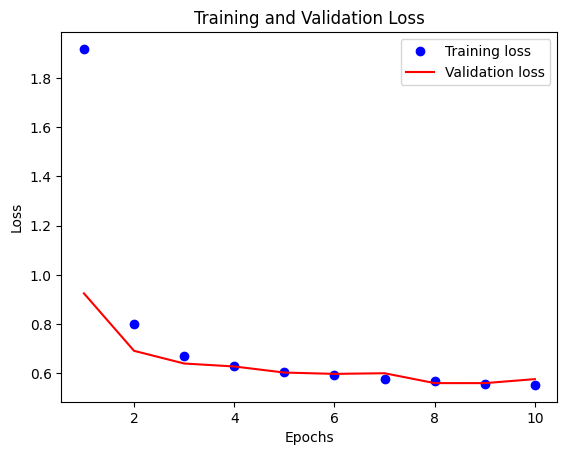

In [ ]:
#TODO:implement with L1 regularization,batch normalization, and Adam optimizer
# implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_2= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # include batch normalization
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu,  kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
# compile model_2
model_2.compile(optimizer=Adam(), loss= tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# Train,evaluate and pring the model
history = model_2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model_2.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
750/750 [==============================] - 6s 5ms/step - loss: 0.7134 - accuracy: 0.8314 - val_loss: 0.5783 - val_accuracy: 0.8611
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.5245 - accuracy: 0.8666 - val_loss: 0.4913 - val_accuracy: 0.8706
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4627 - accuracy: 0.8747 - val_loss: 0.4843 - val_accuracy: 0.8644
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4356 - accuracy: 0.8786 - val_loss: 0.4446 - val_accuracy: 0.8744
Epoch 5/10
750/750 [==============================] - 5s 6ms/step - loss: 0.4176 - accuracy: 0.8836 - val_loss: 0.4378 - val_accuracy: 0.8752
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4102 - accuracy: 0.8826 - val_loss: 0.4281 - val_accuracy: 0.8767
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3963 - accuracy: 0.8867 - val_loss: 0.4240 - val_accuracy: 0.8799
Epoch 

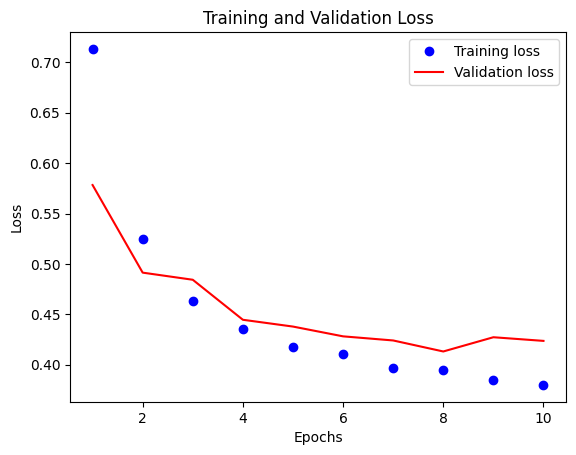

In [ ]:
#TODO:implement with L2 regularization,batch normalization, and Adam optimizer
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_3= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # include batch normalization
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu,  kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
# compile model_3
model_3.compile(optimizer=Adam(), loss= tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# Train,evaluate and pring the model
history = model_3.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model_3.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

# Save the entire model to a HDF5 file
model_3.save('model_3.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

In [ ]:
# confusion matrix and F1 score for model3
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np

# Make predictions on the test set
y_pred = np.argmax(model_3.predict(x_test), axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')

print("Confusion Matrix:")
print(conf_matrix)
print("\nF1 Score:", f1)


313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[865   2  15  23   3   1  75   0  16   0]
 [  1 968   4  19   4   0   3   0   1   0]
 [ 18   0 800  10 123   1  45   0   3   0]
 [ 28   9  12 889  25   0  31   0   6   0]
 [  0   0  75  44 810   0  59   0  12   0]
 [  0   0   0   1   0 933   0  50   6  10]
 [141   2  99  27  70   0 643   0  18   0]
 [  0   0   0   0   0   8   0 978   1  13]
 [  3   0   4   5   3   2   6   4 973   0]
 [  0   0   0   0   0  15   1  60   0 924]]

F1 Score: 0.8773371304198554


In [ ]:
# confusion matrix for model2
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np

# Make predictions on the test set
y_pred = np.argmax(model_2.predict(x_test), axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')

print("Confusion Matrix:")
print(conf_matrix)
print("\nF1 Score:", f1)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[823   1  17  37   2   1 106   0  13   0]
 [  8 957   4  24   2   0   5   0   0   0]
 [ 17   1 768   9 137   1  63   0   4   0]
 [ 48   8   7 866  33   0  32   0   5   1]
 [  0   0 120  40 777   0  56   0   7   0]
 [  0   0   0   1   0 925   0  52   4  18]
 [146   3 127  39  93   0 571   0  21   0]
 [  0   0   0   0   0  25   0 965   0  10]
 [  1   1  11   5   5   2   5   6 964   0]
 [  0   0   0   0   0  18   1  97   0 884]]

F1 Score: 0.848909308379848


Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
def make_predictions(model_path, X):

    # Load the model
    model = load_model(model_path)

    # Make predictions
    predictions = model(X)
    # Convert probabilities to binary labels (0 or 1)
    binary_predictions = (predictions > 0.5).numpy().astype(int)

    return binary_predictions

#Modify the code appropriately

In [ ]:
model_path = 'model_3.h5'
make_predictions(model_path, x_test)

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Comparing L1 & L2 Regularization

L1 applies a penalty based on the absolute values of the weights which may result in some weights being absolutely 0 because it creates sparsity in the model. It is useful in feature selection by removing features that are less important.

In contrast, L2 reduces the weights and encourages more evenly distributed weights. It but does not reduce them to 0 nor encourage sparsity as L1 does. L2 is used to prevent multicollinearity, reducing highly correlated features in the dataset which would otherwise make it difficult for a model to distinguish their individual contributions.

According to our results we found that L2 regularization worked better for our model overall.

Congratulations!!
